# 4 概率

## 4.1 基本概率论

统计学中，把从概率分布中抽取样本的过程称为抽样（sampling）。

In [2]:
import torch
from torch.distributions import multinomial

# 模拟投掷骰子

fair_probs = torch.ones([6]) / 6

counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 10000

tensor([0.0175, 0.0162, 0.0180, 0.0172, 0.0148, 0.0163])

In [6]:
# 进行500组实验，每组抽10个样本

counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts/cum_counts.sum(dim=1, keepdim=True)
estimates


tensor([[0.1000, 0.1000, 0.1000, 0.2000, 0.1000, 0.4000],
        [0.1000, 0.1500, 0.2000, 0.1500, 0.1500, 0.2500],
        [0.1333, 0.1333, 0.2000, 0.2000, 0.1333, 0.2000],
        ...,
        [0.1697, 0.1703, 0.1584, 0.1649, 0.1639, 0.1729],
        [0.1693, 0.1703, 0.1585, 0.1649, 0.1641, 0.1727],
        [0.1692, 0.1704, 0.1586, 0.1646, 0.1648, 0.1724]])

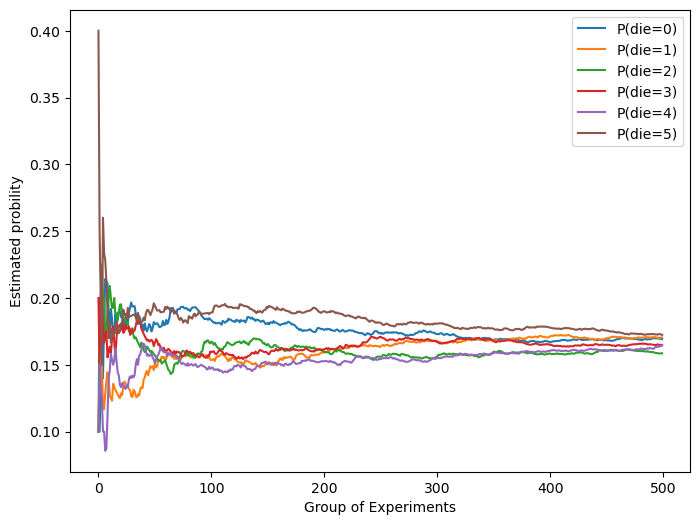

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(6):
    plt.plot(estimates[:,i], label=f'P(die={i})')
plt.xlabel("Group of Experiments")
plt.ylabel("Estimated probility")
plt.legend()
plt.show()

### 概率论公理

事件（event）是一组给定样本空间的随机结果，事件所有的可能结果集合$\mathcal S$称为样本空间（sample space）或结果空间（outcome space），其中每个元素都是结果（outcome）。

概率（probability）可以被认为是将集合映射到真实值的函数。在给定的样本空间$\mathcal S$中，事件$\mathcal A$的概率，表示为$P(\mathcal A)$，满足以下性质：
- 非负性，$P(\mathcal A)\ge 0$
- 可加性，对于互斥事件（mutually exclusive），任意一个事件发生的概率等于其内部各自发生的概率之和，即$P(U_{i=1}^\infty\mathcal A_i)=\sum_{i=1}^\infty P(\mathcal A_i)$
- 整个样本空间的概率为1，即$P(\mathcal S)=1$

### 随机变量

随机变量是随机实验的一组可能性中的某个取值。离散（discrete）随机变量取具体值，连续（continuous）随机变量取区间。

## 4.2 处理多个随机变量

### 联合概率
联合概率(joint probabinity)$P(A=a,B=b)$，回答同时满足$A=a,B=b$的概率是多少。

### 条件概率
联合概率具有一个不等式$0\le\frac{P(A=a,B=b)}{P(A=a)}\le 1$，称这个比率为条件概率（conditional probability），用$P(B=b|A=a)$表示在A=a已发生的情况下B=b的概率

### 贝叶斯定理
$$
P(A|B)=\frac{P(B|A)P(A)}{P(B)}
$$

### 边际化
用B的概率计算A的所有可能选择，并将所有选择的概率聚合在一起
$$
P(B)=\sum_{A}P(A,B)
$$
也称为边际化（marginalization）。边际化的概率或分布称为边际概率（marginal probability）或边际分布（marginal distribution）

### 独立性

另一个重要的属性是依赖（dependence）与独立（independence）。若两个随机变量A和B是独立的，意味着A的发生和B的发生无关。表述为$A\perp B$。
两个随机变量独立，当且仅当两个随机变量的联合分布式其各自分布的乘积$P(A,B)=P(A)P(B)$。
同样地，给定另一个随机变量C时，两个随机变量A和B时条件独立的（conditionally independent），当且仅当$P(A,B|C)=P(A|C)P(B|C)$。这个情况表述为$A\perp B |C$

## 4.3 期望和方差

为了概括概率分布的关键特征，需要一些测量方法。一个随机变量X的期望（expectation）或平均值（average）表示为
$$
E[X] = \sum_x xP(X=x)
$$

当函数f(x)的输入是从分布P中随机抽取的随机变量时，f(x)的期望值为
$$
E_{x\sim P}[f(x)]=\sum_{x}f(x)P(x)
$$

通过方差来量化随机变量X与其期望值的偏置，
$$
Var[X]=E[(X-E[X])^2]=E[X^2]-E[X]^2
$$

方差的平方根被称为标准差（standard deviation）。随机变量函数的方差衡量的是：当从该随机变量分布中采样不同值x时，函数值偏离该函数期望的程度：
$$
Var[f(x)]=E\big[(f(x)-E[f(x)])^2\big]
$$